***Multiple Linear Regression***

Predicting profit of 1000 companies based on the following attributes:
1. R&D Spent
2. Administration
3. Spent on Marketing
4. State company is located
5. Profit

In [23]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [19]:
#importing the dataset and extracting the independent and dependent variables

companies = pd.read_csv("1000_Companies.csv")

X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values


In [20]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


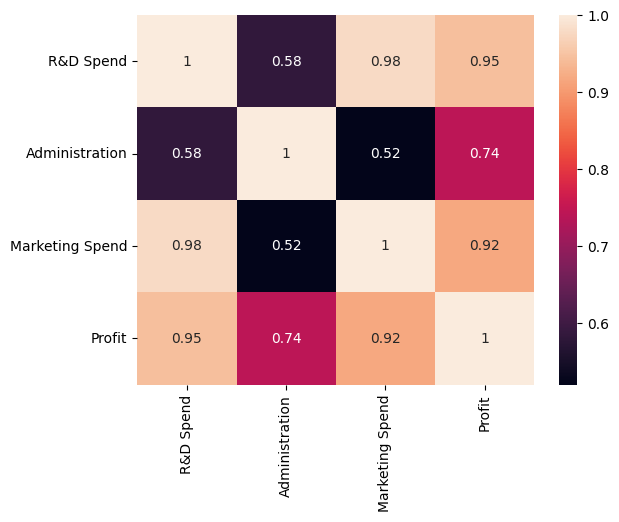

In [27]:
# Select only numeric columns
numeric_companies = companies.select_dtypes(include='number')

"""So we are doing this because we can only numeric columns for correlation and including those columns with numbers only and
excluding the state column as it has discrete values"""


# Data Visualisation
# Building the Correlation matrix

sns.heatmap(numeric_companies.corr(), annot=True)
plt.show()

In [30]:
# ColumnTransformer applies the OneHotEncoder only to column 3.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Column 3 is the categorical 'State' column
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough' # keep other columns as they are
)

X = ct.fit_transform(X)

After one hot encoding we are creating 3 dummy columns for states (California, Florida and NewYork).
But, there can be 2 columns instead as they are dependent.
To avoid the redundancy we use this technique "Avoid Dummy Variable trap" that is drop one dummy column

In [31]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89896.13560404,  88562.75109756,  94887.30651395, 174747.72023756,
        84341.06631724, 110900.50684928, 169762.18978689,  91541.67798113,
       163730.72563736,  54998.21728997,  67560.89729515, 150188.77595231,
       126199.60384888,  60116.93668766, 175679.15927616,  76424.6731863 ,
       118585.29903066, 163025.85283588, 165373.46410366, 180816.33968842,
       101611.90106507,  85866.61261904, 179941.96170712,  84375.47086056,
       104774.82635513, 101085.99176766,  41176.34613386,  58397.55050945,
        69464.05397504, 226504.894275  , 121059.90611405, 111345.24805057,
       102017.4308966 , 137860.2144515 ,  64646.58373968, 108541.70028035,
       184674.67920308, 170603.23571996, 173734.04591357, 118021.40069485,
        97366.10933911, 163884.28725193, 107433.20380238,  52036.91225355,
       116889.40855343,  59427.16827933, 157865.17674616,  79756.87553344,
       159147.37396752, 131189.93574075, 183744.07931955, 173699.64148019,
        93763.70569404,  

In [43]:
# Calculating the Coefficients
print(regressor.coef_)

[ 1.66850593e-07  0.00000000e+00 -3.90842495e-08 ... -9.18374263e-07
  1.04354079e+00  3.55023839e-01]


In [44]:
# Calculating the Intercept
print(regressor.intercept_)

-89058.35581072734


In [45]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8989590247135772